In [137]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression as LR
from matplotlib import pyplot as plt
from tools import *
from sklearn.decomposition import PCA
import plotly.express as px

In [8]:
reg = LR()


In [10]:
# Features
# Span, Chord, Sweep, Tip (x2); weight, altitude, stability. 
# Interactions: later.

In [96]:
def getObs(n):
    obs = {}
    for i in range(n):
        try:
            df = pd.read_csv(f'rocket-results/{i}.csv')
        except:
            print('Missing', i)
        obs[i] = df
    return obs

In [78]:
tot = 0
count = 0
for i in range(400):
    try:
        df = pd.read_csv(f'rocket-results/{i}.csv')
    except:
        continue
    if 90 > df.max()['Time (sec)'] > 20:
        print(i)

In [75]:
df.max()['Altitude (ft)']

18493.71

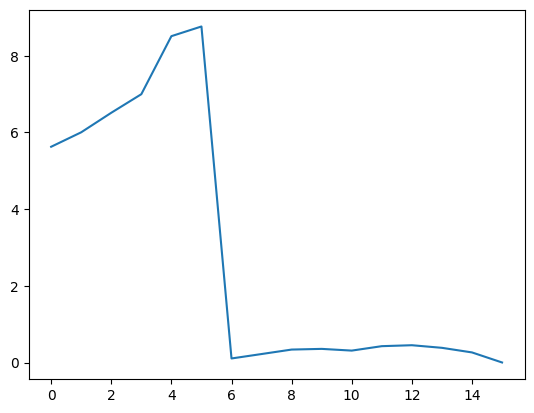

In [76]:
plt.plot(df['Time (sec)'], df['Stability Margin (cal)'])

In [79]:
# use time to classify stability

In [94]:
def initializeConfig():
    configs = {}
    with open('sample_list.pkl', 'rb') as f:
        d = pickle.load(f)
    configs.update(d)
    with open('sample_list_100.pkl', 'rb') as f:
        d = pickle.load(f)
    configs.update(d)
    with open('sample_list_200.pkl', 'rb') as f:
        d = pickle.load(f)
    configs.update(d)
    with open('sample_list_300.pkl', 'rb') as f:
        d = pickle.load(f)
    configs.update(d)
    return configs

In [100]:
config = initializeConfig()
obs = getObs(400)

In [227]:
data = {}
for i in range(len(config)):
    data[i] = list(config[i]['S'].values()) + list(config[i]['B'].values())
    data[i].append(obs[i].max()['Altitude (ft)'])
    data[i].append(obs[i].max()['Stability Margin (cal)'])
    data[i].append(obs[i].max()['Time (sec)'])
df = pd.DataFrame.from_dict(data, orient='index')
df

,0,1,2,3,4,5,6,7,8,9,10
0,9.465233,9.191411,6.313146,6.181568,4.253219,3.362766,2.004250,3.767645,0.004903,-5.119238,0.0100
1,5.050903,2.807665,7.250966,4.202998,7.871765,6.329711,3.563606,6.148326,77117.160000,9.322933,154.9973
2,8.796076,5.131824,8.469040,8.168441,6.226139,7.792487,6.816335,8.795342,51216.000000,6.846969,125.0071
3,5.590219,9.233072,6.352605,8.429602,5.672564,5.705322,5.717624,3.420081,0.004691,-2.486741,0.0100
4,2.916229,4.216994,4.711545,6.462613,4.887217,2.638681,9.605809,5.234709,0.004818,-4.228758,0.0100
...,...,...,...,...,...,...,...,...,...,...,...
395,2.608430,3.346465,5.201403,9.166944,6.192108,3.850187,7.960717,8.586406,70830.750000,4.004949,149.0006
396,7.801407,2.628427,5.543288,9.133362,7.014197,5.730589,4.246228,6.930445,72485.310000,8.235667,150.9995
397,7.364198,8.455093,4.617628,3.805883,4.280772,6.398586,8.552977,8.138172,0.000000,-1.734951,0.0000
398,7.094305,2.423077,2.934079,6.637124,4.526698,3.664447,4.901074,5.327160,73446.170000,4.073147,150.9995


In [229]:
df = df.rename(columns={0: "Schord", 1: "Sspan", 2: "Ssweep", 3: "Stip", 4: "Bchord", 
                        5: "Bspan", 6: "Bsweep", 7: "Btip", 8: "Altitude", 9: "Stability", 10: "Time"})
df

,Schord,Sspan,Ssweep,Stip,Bchord,Bspan,Bsweep,Btip,Altitude,Stability,Time
0,9.465233,9.191411,6.313146,6.181568,4.253219,3.362766,2.004250,3.767645,0.004903,-5.119238,0.0100
1,5.050903,2.807665,7.250966,4.202998,7.871765,6.329711,3.563606,6.148326,77117.160000,9.322933,154.9973
2,8.796076,5.131824,8.469040,8.168441,6.226139,7.792487,6.816335,8.795342,51216.000000,6.846969,125.0071
3,5.590219,9.233072,6.352605,8.429602,5.672564,5.705322,5.717624,3.420081,0.004691,-2.486741,0.0100
4,2.916229,4.216994,4.711545,6.462613,4.887217,2.638681,9.605809,5.234709,0.004818,-4.228758,0.0100
...,...,...,...,...,...,...,...,...,...,...,...
395,2.608430,3.346465,5.201403,9.166944,6.192108,3.850187,7.960717,8.586406,70830.750000,4.004949,149.0006
396,7.801407,2.628427,5.543288,9.133362,7.014197,5.730589,4.246228,6.930445,72485.310000,8.235667,150.9995
397,7.364198,8.455093,4.617628,3.805883,4.280772,6.398586,8.552977,8.138172,0.000000,-1.734951,0.0000
398,7.094305,2.423077,2.934079,6.637124,4.526698,3.664447,4.901074,5.327160,73446.170000,4.073147,150.9995


In [230]:
features = ['Schord', 'Sspan', 'Ssweep', 'Stip', 'Bchord', 'Bspan', 'Bsweep', 'Btip']#, 'Stability']

In [231]:
pca = PCA()
components = pca.fit_transform(df[features])

In [232]:
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

In [233]:
labels

{'0': 'PC 1 (15.5%)',
 '1': 'PC 2 (14.4%)',
 '2': 'PC 3 (13.5%)',
 '3': 'PC 4 (12.4%)',
 '4': 'PC 5 (11.7%)',
 '5': 'PC 6 (11.4%)',
 '6': 'PC 7 (11.1%)',
 '7': 'PC 8 (10.0%)'}

In [235]:
fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions = range(2),
    color=df['Stability']
)
fig.update_traces(diagonal_visible=False)
fig.show()

/Users/alanyu/opt/miniconda3/envs/rocket/lib/python3.9/site-packages/plotly/express/_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



In [260]:
X_train, X_test = df.iloc[:300, :-3], df.iloc[300:, :-3]
Y_train, Y_test = df.iloc[:300, -1] > 90, df.iloc[300:, -1] > 90

In [261]:
reg.fit(X_train, Y_train)

LogisticRegression()

In [266]:
sum(reg.predict(X_test) == Y_test)

83

In [267]:
reg.predict(np.array([[5,6,6,6,7,3,4,9]]))

/Users/alanyu/opt/miniconda3/envs/rocket/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



array([False])